In [6]:
import h5py
import numpy as np

file_path = '/ca24/AstroCode-Collective/src/daneel/detection/Simple_Transmission.h5'

# Open the file and inspect its structure
with h5py.File(file_path, 'r') as f:
    print("Datasets and groups in the file:")
    def print_structure(name, obj):
        print(name)
    f.visititems(print_structure)


Datasets and groups in the file:
Bibliography
Bibliography/bibtex
Bibliography/short_form
ModelParameters
ModelParameters/Chemistry
ModelParameters/Chemistry/CH4
ModelParameters/Chemistry/CH4/gas_type
ModelParameters/Chemistry/CH4/mix_ratio
ModelParameters/Chemistry/CH4/molecule_name
ModelParameters/Chemistry/CO
ModelParameters/Chemistry/CO/gas_type
ModelParameters/Chemistry/CO/mix_ratio
ModelParameters/Chemistry/CO/molecule_name
ModelParameters/Chemistry/CO2
ModelParameters/Chemistry/CO2/gas_type
ModelParameters/Chemistry/CO2/mix_ratio
ModelParameters/Chemistry/CO2/molecule_name
ModelParameters/Chemistry/H2O
ModelParameters/Chemistry/H2O/gas_type
ModelParameters/Chemistry/H2O/mix_ratio
ModelParameters/Chemistry/H2O/molecule_name
ModelParameters/Chemistry/active_gases
ModelParameters/Chemistry/chemistry_type
ModelParameters/Chemistry/fill_gases
ModelParameters/Chemistry/inactive_gases
ModelParameters/Chemistry/ratio
ModelParameters/Contributions
ModelParameters/Contributions/Absorption

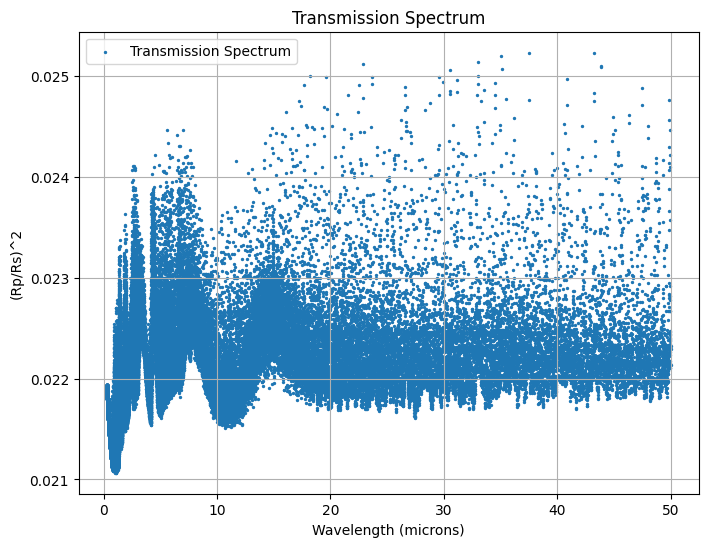

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Path to the HDF5 file
file_path = '/ca24/AstroCode-Collective/src/daneel/detection/Simple_Transmission.h5'

# Open the HDF5 file and extract data
with h5py.File(file_path, 'r') as f:
    # Extract wavelength and spectrum
    wavelength = f['Output/Spectra/native_wlgrid'][:]  # Wavelength grid
    spectrum = f['Output/Spectra/native_spectrum'][:]  # Native spectrum

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(wavelength, spectrum, s=2, label='Transmission Spectrum')
plt.xlabel('Wavelength (microns)')
plt.ylabel('(Rp/Rs)^2')
plt.title('Transmission Spectrum')
plt.legend()
plt.grid(True)
plt.savefig('/ca24/AstroCode-Collective/HD_209458_b_assignment3_taskA_spectrum.png')  # Save the plot
plt.show()


In [6]:

# adjusted: Save forward model parameters to .txt file
parameters_output_path = '/ca24/AstroCode-Collective/HD_209458_b_assignment3_taskA_parameters.txt'
forward_model_parameters = """
Planetary Parameters:
- Planet Name: HD 209458 b
- Atmospheric Composition: H2O, CH4, CO2, CO (randomized abundances [10^-8, 10^-2])
- Planetary Radius: 1.36 R_J
- Semi-major Axis: 0.047 AU
- Temperature: 1400 K

Stellar Parameters:
- Stellar Radius: 1.146 R_sun
- Stellar Temperature: 6091 K
- Stellar Luminosity: 1.62 L_sun

TauREx Simulation Details:
- Forward Model: Transmission Spectrum
- Wavelength Range: 0.3 - 5 microns
- Resolution: 300
"""
with open(parameters_output_path, 'w') as f:
    f.write(forward_model_parameters)


In [5]:
# Calculate error as sqrt((Rp/Rs)^2)
error = np.sqrt(spectrum)

# Combine wavelength, spectrum, and error into a single array
data = np.column_stack((wavelength, spectrum, error))

# Save to a .dat file
dat_file_path = '/ca24/AstroCode-Collective/HD_209458_b_assignment3_taskA_spectrum.dat'
np.savetxt(
    dat_file_path,
    data,
    header="Wavelength(microns)  (Rp/Rs)^2  Error",
    fmt="%.6e"
)

print(f"Spectrum data saved to: {dat_file_path}")


Spectrum data saved to: /ca24/AstroCode-Collective/HD_209458_b_assignment3_taskA_spectrum.dat
